In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('base_data.csv',parse_dates=['date'])

In [8]:
data.shape

(2340, 7)

In [9]:
data.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1


In [10]:
data.describe()

,sourceid,destinationid,amountofmoney,date,isfraud
count,2340.000000,2340.000000,2.340000e+03,2340,2340.000000
mean,49111.255128,52257.918803,2.508583e+06,2019-05-06 22:45:03.974359040,0.597863
min,61.000000,53.000000,1.333200e+04,2019-02-20 10:23:00,0.000000
25%,24033.000000,28046.000000,3.359140e+05,2019-03-31 09:39:15,0.000000
50%,46632.500000,52748.500000,1.162354e+06,2019-05-07 14:06:00,1.000000
75%,75107.000000,78030.000000,4.686559e+06,2019-06-11 14:44:45,1.000000
max,100000.000000,99950.000000,7.952497e+06,2019-07-20 14:33:00,1.000000
std,29614.440603,28988.847246,2.560434e+06,NaN,0.490434


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   typeofaction   2340 non-null   object        
 1   sourceid       2340 non-null   int64         
 2   destinationid  2340 non-null   int64         
 3   amountofmoney  2340 non-null   int64         
 4   date           2340 non-null   datetime64[ns]
 5   isfraud        2340 non-null   int64         
 6   typeoffraud    2340 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 128.1+ KB


In [12]:
data.isnull().sum()

typeofaction     0
sourceid         0
destinationid    0
amountofmoney    0
date             0
isfraud          0
typeoffraud      0
dtype: int64

In [13]:
data.nunique()

typeofaction        2
sourceid         1749
destinationid    1710
amountofmoney     933
date             2309
isfraud             2
typeoffraud         4
dtype: int64

In [19]:
cat_cols = data.drop(columns=['isfraud']).select_dtypes('object').columns.to_list()
num_cols = data.drop(columns=['isfraud']).select_dtypes('int','float').columns.to_list()

In [21]:
num_cols,cat_cols

(['sourceid', 'destinationid', 'amountofmoney'],
 ['typeofaction', 'typeoffraud'])

In [22]:
len(num_cols),len(cat_cols)

(3, 2)

In [24]:
data.duplicated().sum()

0

## Encode the categorical Data

In [27]:
for col in cat_cols:
  print(f'{col} , {data[col].unique().tolist()}')

typeofaction , ['cash-in', 'transfer']
typeoffraud , ['type1', 'type2', 'type3', 'none']


In [28]:
data['typeofaction'] = data['typeofaction'].map({'cash-in' : 0,'transfer':1})
data['typeoffraud'] = data['typeoffraud'].map({'type1':0,'type2':1,'type3':2 , 'none':3})

In [33]:
data.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,0,30105,28942,494528,2019-07-19 14:40:00,1,0
1,0,30105,8692,494528,2019-05-17 14:57:00,1,0
2,0,30105,60094,494528,2019-07-20 13:20:00,1,0
3,0,30105,20575,494528,2019-07-03 14:15:00,1,0
4,0,30105,45938,494528,2019-05-26 10:40:00,1,0


In [35]:
for col in cat_cols:
  print(f'{col} : {data[col].unique().tolist()}')

typeofaction : [0, 1]
typeoffraud : [0, 1, 2, 3]


In [36]:
#now add these categorical columns to numerical columns

In [38]:
num_cols.extend(cat_cols)
num_cols

['sourceid',
 'destinationid',
 'amountofmoney',
 'typeofaction',
 'typeoffraud',
 'typeofaction',
 'typeoffraud']

In [40]:
date_indexed_data = data.set_index('date')

In [43]:
date_indexed_data.head()

,typeofaction,sourceid,destinationid,amountofmoney,isfraud,typeoffraud
date,,,,,,
2019-07-19 14:40:00,0,30105,28942,494528,1,0
2019-05-17 14:57:00,0,30105,8692,494528,1,0
2019-07-20 13:20:00,0,30105,60094,494528,1,0
2019-07-03 14:15:00,0,30105,20575,494528,1,0
2019-05-26 10:40:00,0,30105,45938,494528,1,0


In [44]:
def plot_num_cols(
    df: pd.DataFrame,
    num_cols: list[str],
    kind,
    subplots: tuple[int, int] = (2, 3),
    title: str | None = None,
    figsize: tuple[int, int] = (10, 6),
    savefig_path: str | None = None,
):
    fig, axes = plt.subplots(*subplots, figsize=figsize)

    if title:
        fig.suptitle(title)

    for ax, col in zip(axes.ravel(), num_cols):
        df[col].plot(kind=kind, ax=ax, title=col)

    plt.tight_layout()
    if savefig_path:
        plt.savefig(savefig_path)

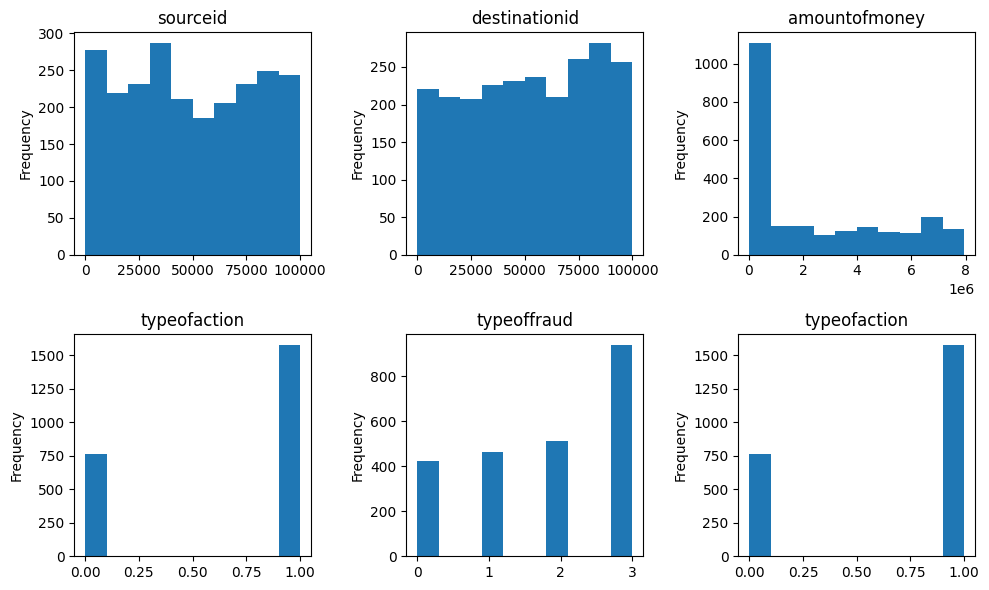

In [45]:
plot_num_cols(data,num_cols,'hist')

In [47]:
data[num_cols].skew()

sourceid         0.042332
destinationid   -0.100452
amountofmoney    0.744457
typeofaction    -0.748785
typeoffraud     -0.420848
typeofaction    -0.748785
typeoffraud     -0.420848
dtype: float64

## Here, amountofmoney is highly positve skewed with 0.744.
Also, a categorical column typeofaction is highly negative skewed with -0.748.

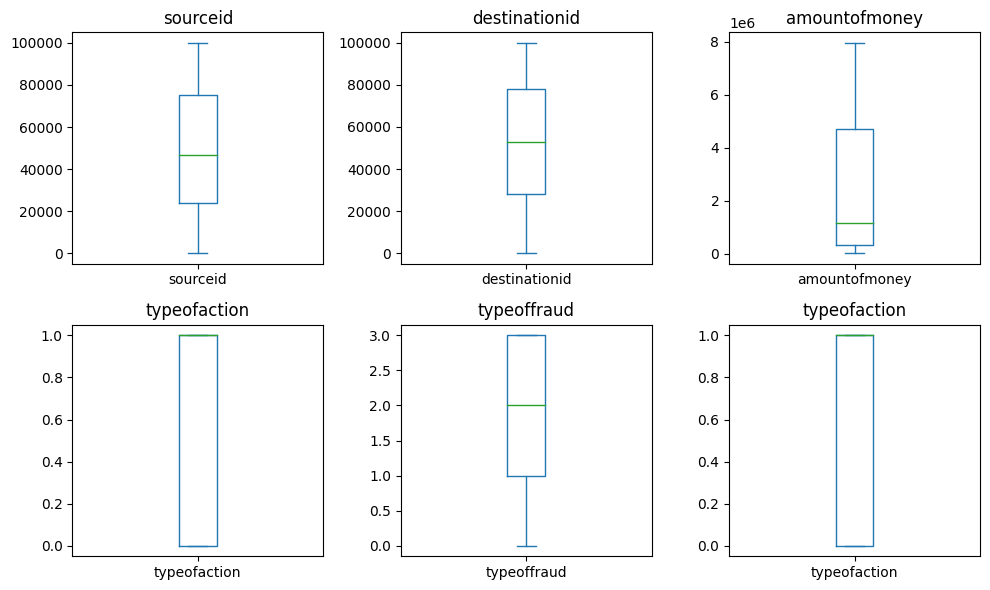

In [48]:
plot_num_cols(data,num_cols,'box')

In [49]:

def plot_cat_cols(
    df: pd.DataFrame,
    cat_cols: list[str],
    kind,
    subplots: tuple[int, int] = (1, 2),
    title: str | None = None,
    figsize = (10, 6),
    savefig_path: str | None = None,
):
    fig, axes = plt.subplots(*subplots, figsize=figsize)

    if title:
        fig.suptitle(title)

    plt.tight_layout()

    for ax, col in zip(axes.ravel(), cat_cols):
        df[col].value_counts().sort_index().plot(kind=kind, ax=ax)

    if savefig_path:
        plt.savefig(savefig_path)

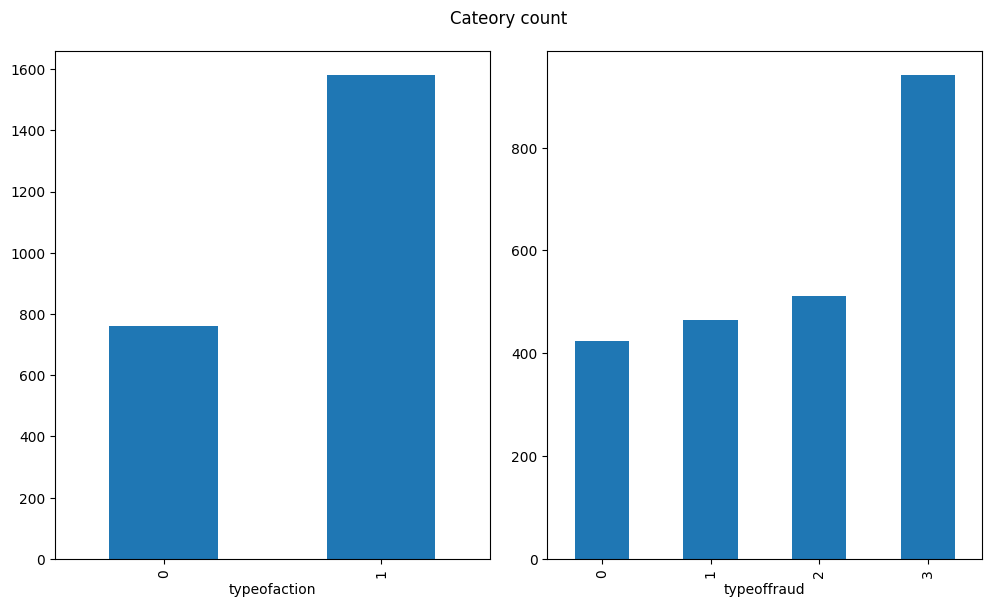

In [50]:
plot_cat_cols(data, cat_cols, 'bar', title='Cateory count')


<Axes: >

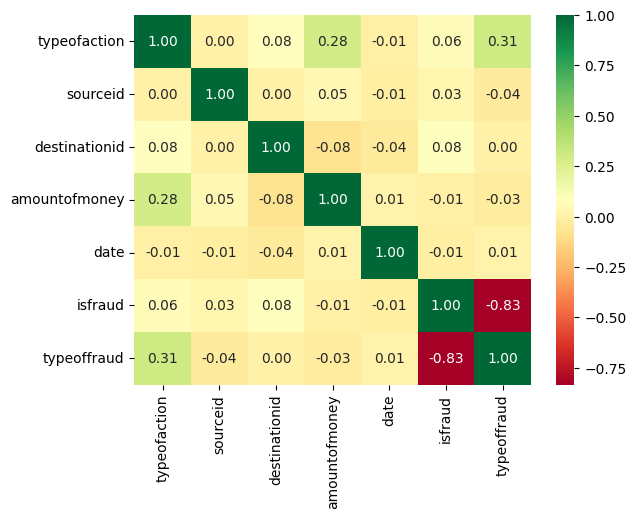

In [53]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='RdYlGn', cbar=True)

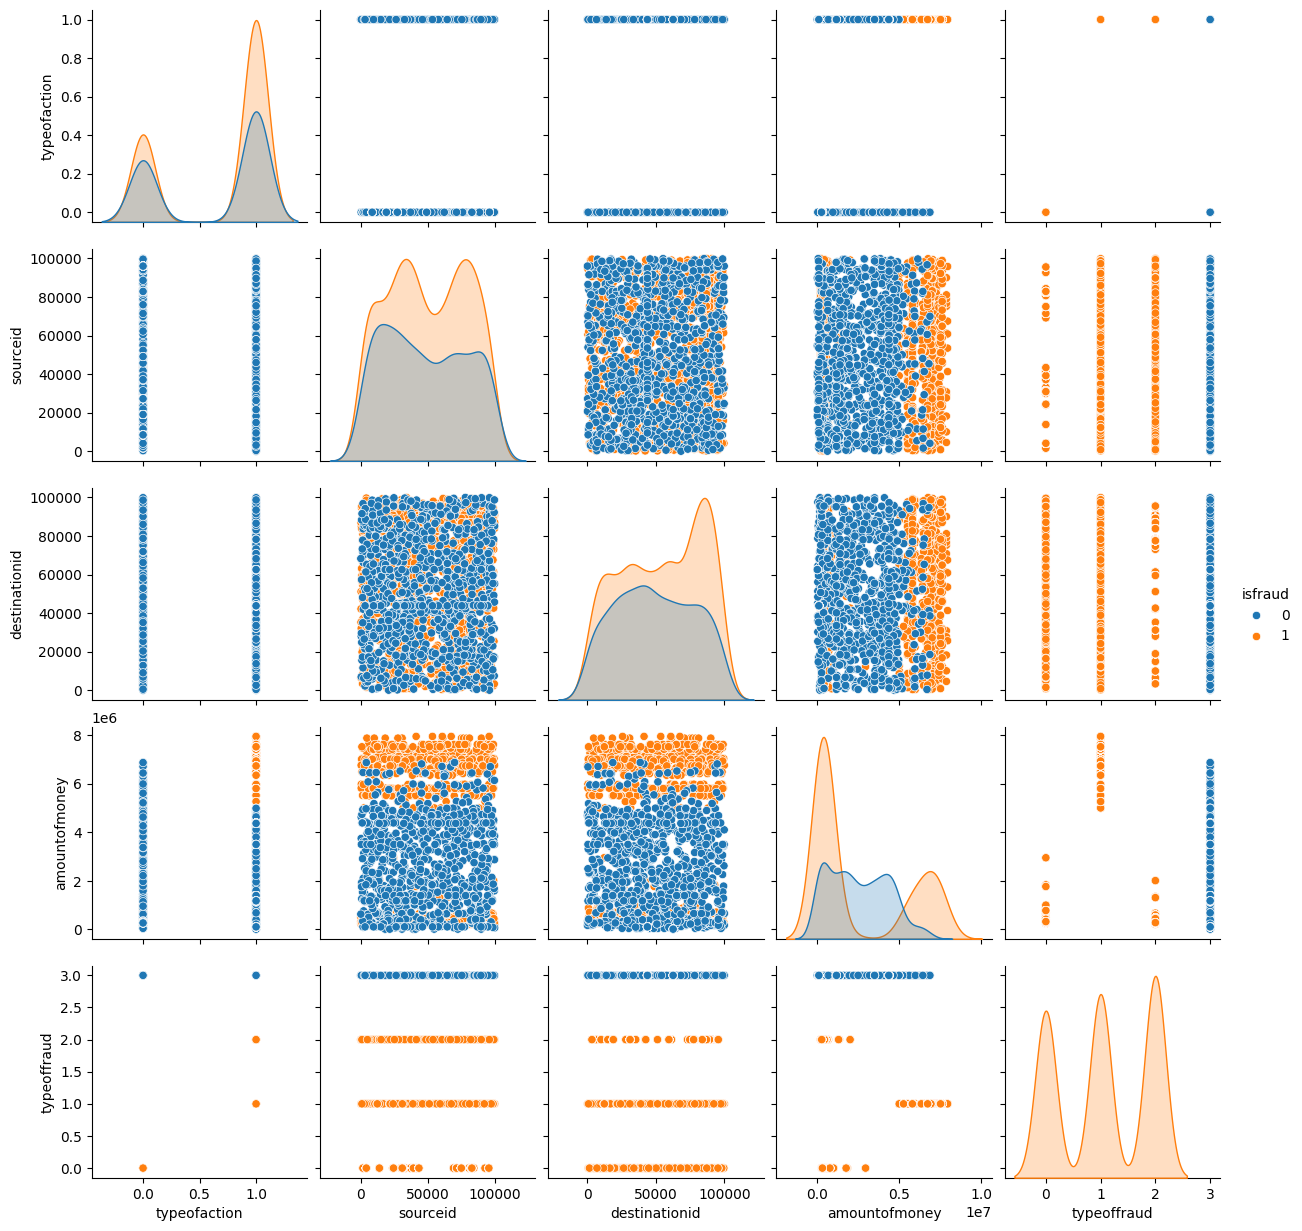

In [59]:
target = 'isfraud'
sns.pairplot(data.drop(columns=['date']), hue=target)

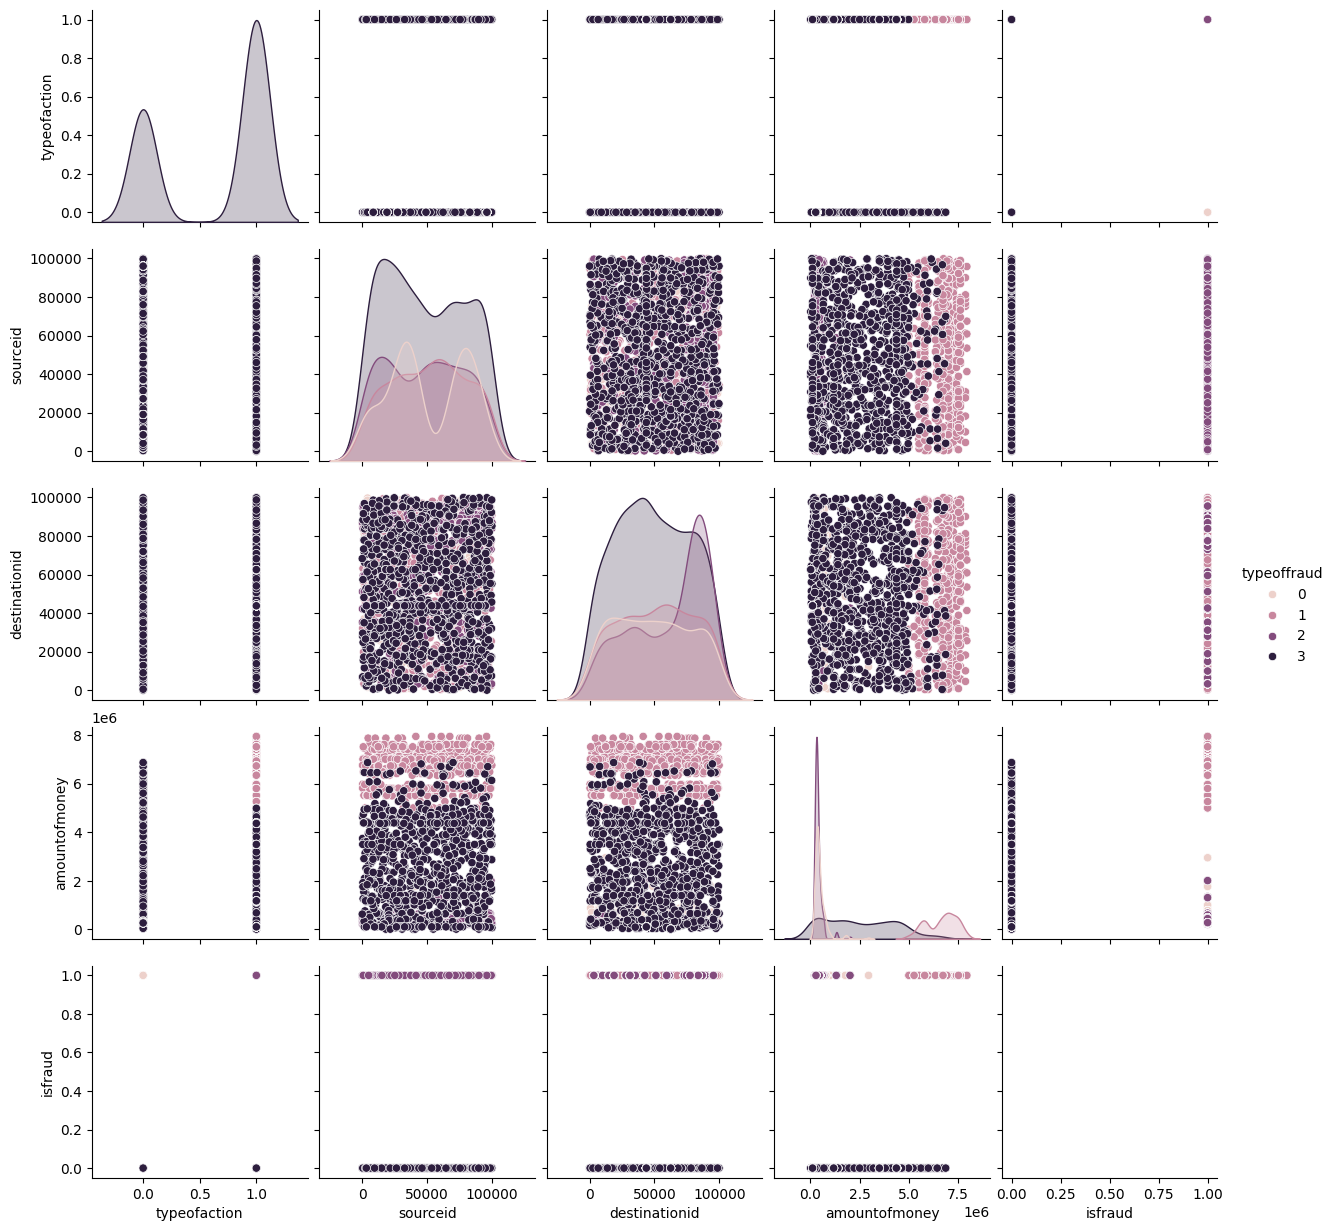

In [60]:
target = 'typeoffraud'
sns.pairplot(data.drop(columns=['date']), hue=target)

In [62]:
data['date'] = pd.to_datetime(data['date'])

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   typeofaction   2340 non-null   int64         
 1   sourceid       2340 non-null   int64         
 2   destinationid  2340 non-null   int64         
 3   amountofmoney  2340 non-null   int64         
 4   date           2340 non-null   datetime64[ns]
 5   isfraud        2340 non-null   int64         
 6   typeoffraud    2340 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 128.1 KB


In [68]:
data['date_month_name'] = data['date'].dt.month_name()

data.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud,date_month_name
0,0,30105,28942,494528,2019-07-19 14:40:00,1,0,July
1,0,30105,8692,494528,2019-05-17 14:57:00,1,0,May
2,0,30105,60094,494528,2019-07-20 13:20:00,1,0,July
3,0,30105,20575,494528,2019-07-03 14:15:00,1,0,July
4,0,30105,45938,494528,2019-05-26 10:40:00,1,0,May


In [69]:
data.drop('date', axis=1, inplace=True)

In [70]:
data.head()

,typeofaction,sourceid,destinationid,amountofmoney,isfraud,typeoffraud,date_month_name
0,0,30105,28942,494528,1,0,July
1,0,30105,8692,494528,1,0,May
2,0,30105,60094,494528,1,0,July
3,0,30105,20575,494528,1,0,July
4,0,30105,45938,494528,1,0,May


In [72]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['isfraud']=encoder.fit_transform(data['isfraud'])

In [75]:
data['isfraud'].value_counts()

isfraud
1    1399
0     941
Name: count, dtype: int64

In [76]:
## independent and depemndent features
X=data.drop(labels=['isfraud'],axis=1)
y=data['isfraud']

In [78]:
X.head()

,typeofaction,sourceid,destinationid,amountofmoney,typeoffraud,date_month_name
0,0,30105,28942,494528,0,July
1,0,30105,8692,494528,0,May
2,0,30105,60094,494528,0,July
3,0,30105,20575,494528,0,July
4,0,30105,45938,494528,0,May


In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [80]:
from sklearn.impute import SimpleImputer##handling missing values
from sklearn.preprocessing import OneHotEncoder## handling categorical values
from sklearn.preprocessing import StandardScaler## fetaure scaling
from sklearn.pipeline import Pipeline
from sklearn.compose import  ColumnTransformer
##automating the entire

In [81]:
categorical_cols=['typeofaction','typeoffraud','date_month_name']
numerical_cols=['sourceid', 'destinationid', 'amountofmoney']

In [82]:
## feature engineering automation
num_pipeline=Pipeline(
    steps=[
         ('imputer',SimpleImputer(strategy='median')), ## missing values
         ('scaler', StandardScaler()) ## feature scaling

    ]
)

## for categorical pipeline
cat_pipeline=Pipeline(
    steps=[
         ('imputer',SimpleImputer(strategy='most_frequent')), ## missing values
         ('onehotencoder', OneHotEncoder()) ## categorical features to numerical

    ]
)

In [83]:
preprocessor=ColumnTransformer([
    ('num_pipeline', num_pipeline,numerical_cols),
    ('cat_pipeline', cat_pipeline,categorical_cols)
])

In [84]:
X_train.head()


,typeofaction,sourceid,destinationid,amountofmoney,typeoffraud,date_month_name
787,1,33473,32740,7422956,1,April
1503,0,45772,24950,131219,3,June
1187,1,78804,86903,215499,2,May
679,1,25531,37485,7012527,1,May
65,0,1615,72623,639229,0,July


In [85]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [87]:
## automate Model training proess
models={
    'Random Forest':RandomForestClassifier(),
    'Support Vector Machine':SVC(),
    'Naive Bayes':GaussianNB(),
    'KNN':KNeighborsClassifier()


}

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
def evaluate_model(X_train,y_train,X_test,y_test,models):

    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        # Train model
        model.fit(X_train,y_train)



        # Predict Testing data
        y_test_pred =model.predict(X_test)

        # Get accuracy for test data prediction

        test_model_score = accuracy_score(y_test,y_test_pred)

        report[list(models.keys())[i]] =  test_model_score



    return report

In [90]:
evaluate_model(X_train,y_train,X_test,y_test,models)


{'Random Forest': 1.0,
 'Support Vector Machine': 1.0,
 'Naive Bayes': 1.0,
 'KNN': 1.0}